In [1]:
import librosa
import librosa.filters
import math
import numpy as np
import scipy as sp
from scipy import signal, fft, optimize
from matplotlib import pylab as plt

In [2]:
n_fft = 1024
hop_length = 256
win_length = n_fft
gl_iters = 60

In [3]:
def _stft(y):
    return librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)


def _istft(y):
    return librosa.istft(y, hop_length=hop_length, win_length=win_length)


def _load_wav(path):
    return librosa.core.load(path, sr=None)


def _save_wav(wav, path):
    wav *= 32767 / max(0.01, np.max(np.abs(wav)))
    librosa.output.write_wav(path, wav.astype(np.int16), sample_rate)

    
def _griffin_lim(S):
    '''librosa implementation of Griffin-Lim
    Based on https://github.com/librosa/librosa/issues/434
    '''
    angles = np.exp(2j * np.pi * np.random.rand(*S.shape))
    S_complex = np.abs(S).astype(np.complex)
    y = _istft(S_complex * angles)
    for i in range(gl_iters):
      angles = np.exp(1j * np.angle(_stft(y)))
      y = _istft(S_complex * angles)
    return y


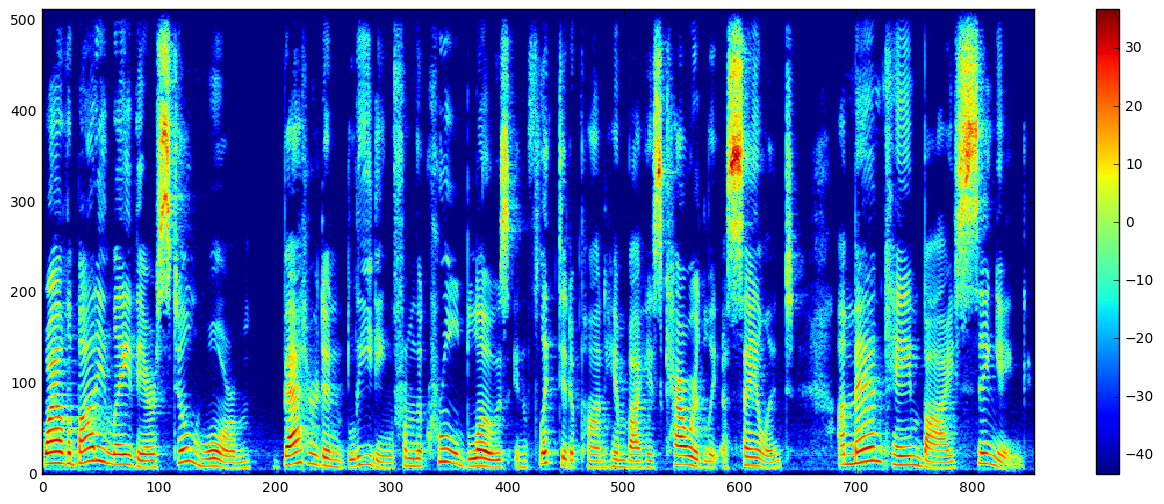

In [5]:
%matplotlib inline
sound, sample_rate = _load_wav('sound.wav')
S = _stft(sound)
plt.figure(figsize=(16,6))
plt.imshow(librosa.amplitude_to_db(np.abs(S)), aspect='auto', origin='lower', interpolation='none')
plt.colorbar()

In [ ]:
%%time
res = _griffin_lim(np.abs(S))
save_wav(res, 'gf_res.wav')